<a href="https://colab.research.google.com/github/CommanderWedgeAntilles/CS450/blob/master/Copy_of_Module_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Flops

In [ ]:
import pandas as pd

spotify = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data.csv')

First, let's look at the boxplot of the "popularity" column to determine the value for flops:

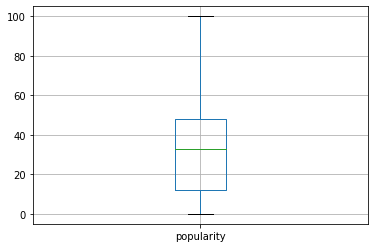

In [ ]:
spotify.boxplot(column="popularity")

In [ ]:
spotify.popularity.describe()

count    169909.000000
mean         31.556610
std          21.582614
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

It looks like values that are less than 12 are definitely flops (in the 1st quartile). So let's create a column based on this value being a flop.

In [ ]:
#Let's create a new column where we would know if somebody was contacted before or not
f = lambda x: "Yes" if (x <= 12) else "No"
spotify["flop"] = list(map(f,spotify["popularity"]))
spotify

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,flop
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,Yes
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,Yes
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,Yes
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,Yes
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,No
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,No
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,No
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020,No


Now let's check if our data is balanced:

In [ ]:
spotify.flop.value_counts()

No     126960
Yes     42949
Name: flop, dtype: int64

In [ ]:
126960/(126960+42949)

0.7472235137632497

It is not, 75% of our target value says "No", so let's balance our data:

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html


# Let's over sample the minority class, which samples with replacement until the
# majority (no) and the minority (yes) are equal
ro = RandomOverSampler()

# Decide which features to use
features = ['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
            'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
            'mode', 'name', 'release_date', 'speechiness', 'tempo', 'valence', 'year'] 

X = spotify[features]
y = spotify['flop']

# Oversample, note that we oversample X and y at the same time in order to 
# make sure our features and targets stay synched.
X_new, y_new = ro.fit_resample(X, y)

# Convert this to a dataframe and check the counts, now they're equal, because
# we have a bunch of duplicate survivors

balanced_spotify = pd.DataFrame(data=X_new, columns= ['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
            'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
            'mode', 'name', 'release_date', 'speechiness', 'tempo', 'valence', 'year'] )
balanced_spotify['flop'] = y_new 
balanced_spotify.flop.value_counts()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Yes    126960
No     126960
Name: flop, dtype: int64

Now that we have 50% "Yes" and 50% "No" (balanced data), let's check if all the values are still the correct type.

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [ ]:
balanced_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253920 entries, 0 to 253919
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   acousticness      253920 non-null  object
 1   artists           253920 non-null  object
 2   danceability      253920 non-null  object
 3   duration_ms       253920 non-null  object
 4   energy            253920 non-null  object
 5   explicit          253920 non-null  object
 6   id                253920 non-null  object
 7   instrumentalness  253920 non-null  object
 8   key               253920 non-null  object
 9   liveness          253920 non-null  object
 10  loudness          253920 non-null  object
 11  mode              253920 non-null  object
 12  name              253920 non-null  object
 13  release_date      253920 non-null  object
 14  speechiness       253920 non-null  object
 15  tempo             253920 non-null  object
 16  valence           253920 non-null  obj

The types have changed, so let's change them back to what they were supposed to be:

In [ ]:
balanced_spotify['acousticness'] = balanced_spotify['acousticness'].astype('float64')
balanced_spotify['danceability'] = balanced_spotify['danceability'].astype('float64')
balanced_spotify['duration_ms'] = balanced_spotify['duration_ms'].astype('int64')
balanced_spotify['energy'] = balanced_spotify['energy'].astype('float64')
balanced_spotify['explicit'] = balanced_spotify['explicit'].astype('int64')
balanced_spotify['instrumentalness'] = balanced_spotify['instrumentalness'].astype('float64')
balanced_spotify['key'] = balanced_spotify['key'].astype('int64')
balanced_spotify['liveness'] = balanced_spotify['liveness'].astype('float64')
balanced_spotify['loudness'] = balanced_spotify['loudness'].astype('float64')
balanced_spotify['mode'] = balanced_spotify['mode'].astype('int64')
balanced_spotify['speechiness'] = balanced_spotify['speechiness'].astype('float64')
balanced_spotify['tempo'] = balanced_spotify['tempo'].astype('float64')
balanced_spotify['valence'] = balanced_spotify['valence'].astype('float64')
balanced_spotify['year'] = balanced_spotify['year'].astype('int64')

balanced_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253920 entries, 0 to 253919
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      253920 non-null  float64
 1   artists           253920 non-null  object 
 2   danceability      253920 non-null  float64
 3   duration_ms       253920 non-null  int64  
 4   energy            253920 non-null  float64
 5   explicit          253920 non-null  int64  
 6   id                253920 non-null  object 
 7   instrumentalness  253920 non-null  float64
 8   key               253920 non-null  int64  
 9   liveness          253920 non-null  float64
 10  loudness          253920 non-null  float64
 11  mode              253920 non-null  int64  
 12  name              253920 non-null  object 
 13  release_date      253920 non-null  object 
 14  speechiness       253920 non-null  float64
 15  tempo             253920 non-null  float64
 16  valence           25

Now, let's create the Decision Tree:

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# I am using only continuous features here because all the categorical don't really help us (like id, or artists)
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
            'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
            'mode', 'speechiness', 'tempo', 'valence', 'year']
X = balanced_spotify[features]

y = balanced_spotify.flop

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
clf = DecisionTreeClassifier(min_samples_leaf = 1, max_depth=25)

# Train it
clf.fit(X_train, y_train)

# Test it 
clf.score(X_test, y_test)


0.9648839529510607

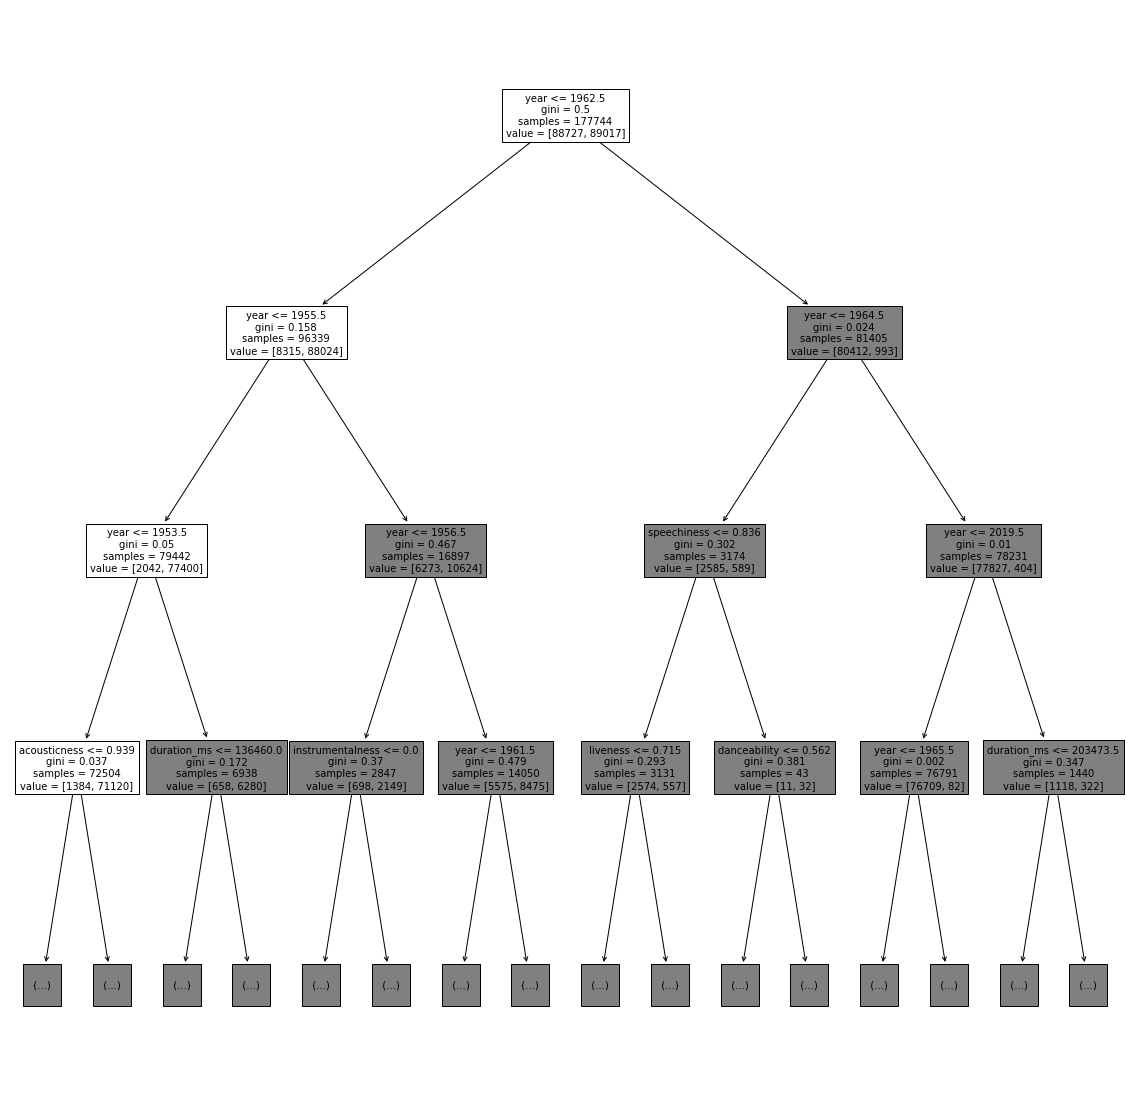

In [ ]:
# Let's visualize the tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns, max_depth=3)
plt.show()